In [63]:
import pandas as pd
import requests
import json
import glob, os
import numpy as np
import matplotlib.pyplot as plt
api = 'c4ad87b03bec1878bc0be6156d4472b0'
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [2]:
def get_pe(ticker):
    
    
    prices_request = requests.get(f'https://financialmodelingprep.com/api/v3/quote/{ticker}?apikey={api}').json()
    

    #dates_df = pd.DataFrame.from_dict(prices_request,orient='columns')
    out_file = open(f"dailyPrices/{ticker}.json", "w") 
    json.dump(prices_request, out_file, indent = 4) 
    out_file.close() 
    
    with open(f'dailyPrices/{ticker}.json','r') as f:
        data = json.loads(f.read())
    # Flatten data
    df_nested_list = pd.json_normalize(data)
    df_nested_list['Ticker'] = ticker
    df_nested_list.to_csv(f"dailyPrices/{ticker}.csv")
    #return df_nested_list

In [7]:
SP500_df = pd.read_csv('sp500_constituent.csv')
tickers = SP500_df['symbol']
tech = SP500_df[SP500_df['sector']=='Information Technology']['symbol']
comm_serv = SP500_df[SP500_df['sector']=='Communication Services']['symbol']

result_tech = [get_pe(ticker) for ticker in tech]
result_commserv = [get_pe(ticker) for ticker in comm_serv]

In [8]:
path = '/Users/brendan/Desktop/Python/BoostedAI/dailyPrices'
csv_files = [f for f in os.listdir(path) if f.endswith('csv')]
csv_files

['CSCO.csv',
 'TER.csv',
 'V.csv',
 'QRVO.csv',
 'FOX.csv',
 'FLT.csv',
 'SWKS.csv',
 'ENPH.csv',
 'MCHP.csv',
 'CDNS.csv',
 'CHTR.csv',
 'T.csv',
 'DISH.csv',
 'APH.csv',
 'MSI.csv',
 'GPN.csv',
 'WBD.csv',
 'DXC.csv',
 'PARA.csv',
 'ADI.csv',
 'ADBE.csv',
 'NOW.csv',
 'NWS.csv',
 'ZBRA.csv',
 'BR.csv',
 'STX.csv',
 'IPG.csv',
 'CDAY.csv',
 'ORCL.csv',
 'INTU.csv',
 'PAYC.csv',
 'INTC.csv',
 'GLW.csv',
 'TXN.csv',
 'FTNT.csv',
 'JNPR.csv',
 'ADSK.csv',
 'WDC.csv',
 'LUMN.csv',
 'PYPL.csv',
 'MSFT.csv',
 'ANSS.csv',
 'IT.csv',
 'ACN.csv',
 'VRSN.csv',
 'HPQ.csv',
 'AMAT.csv',
 'ATVI.csv',
 'EA.csv',
 'AMD.csv',
 'KLAC.csv',
 'NXPI.csv',
 'SEDG.csv',
 'MTCH.csv',
 'NVDA.csv',
 'TYL.csv',
 'HPE.csv',
 'CMCSA.csv',
 'CTXS.csv',
 'PTC.csv',
 'FIS.csv',
 'NLOK.csv',
 'IBM.csv',
 'TWTR.csv',
 'MPWR.csv',
 'DIS.csv',
 'NFLX.csv',
 'OMC.csv',
 'AKAM.csv',
 'GOOGL.csv',
 'ANET.csv',
 'PAYX.csv',
 'META.csv',
 'FOXA.csv',
 'FFIV.csv',
 'SNPS.csv',
 'GOOG.csv',
 'EPAM.csv',
 'LYV.csv',
 'AVGO.csv

In [10]:
raw_data_df = []
for file in csv_files:
    file = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/dailyPrices/'+file)
    df = pd.DataFrame(file)
    #df['ticker'] = file
    raw_data_df.append(df)
master_df = pd.concat(raw_data_df)

In [13]:
master_df.head()

,Unnamed: 0,symbol,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,priceAvg50,priceAvg200,volume,avgVolume,exchange,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp,Ticker
0,0,CSCO,"Cisco Systems, Inc.",45.37,-0.55,-0.25,44.83,45.48,64.29,40.82,"187,875,344,384.00",43.90,52.84,23701677,24265488,NASDAQ,45.11,45.62,2.85,15.92,2022-02-07T10:59:00.000+0000,4140959762,1659278254,CSCO
0,0,TER,"Teradyne, Inc.",100.89,1.96,1.94,97.73,101.18,168.91,82.97,"16,162,881,536.00",97.30,121.63,1622462,1780795,NASDAQ,98.90,98.95,4.75,21.24,2022-10-24T10:59:00.000+0000,160203009,1659278265,TER
0,0,V,Visa Inc.,212.11,0.36,0.76,209.85,214.14,247.83,185.91,"447,734,513,664.00",204.79,211.54,6059699,6751074,NYSE,212.00,211.35,6.79,31.24,2022-10-24T10:59:00.000+0000,2110859996,1659278266,V
0,0,QRVO,"Qorvo, Inc.",104.07,0.22,0.23,102.50,104.46,201.46,90.16,"10,794,868,736.00",101.85,129.71,1336539,1458419,NASDAQ,104.27,103.84,9.26,11.24,2022-08-03T20:00:00.000+0000,103726999,1659278262,QRVO
0,0,FOX,Fox Corporation,30.90,-4.54,-1.47,30.73,32.32,40.91,28.96,"17,892,368,384.00",30.96,34.90,1357100,1140400,NASDAQ,32.28,32.37,1.92,16.09,NaN,579041048,1659278270,FOX


In [21]:
def get_mcap(ticker):
    
    
    prices_request = requests.get(f'https://financialmodelingprep.com/api/v3/historical-market-capitalization/{ticker}?limit=1260&apikey={api}').json()
    

    #dates_df = pd.DataFrame.from_dict(prices_request,orient='columns')
    out_file = open(f"historicalMCap/{ticker}.json", "w") 
    json.dump(prices_request, out_file, indent = 4) 
    out_file.close() 
    
    with open(f'historicalMCap/{ticker}.json','r') as f:
        data = json.loads(f.read())
    # Flatten data
    df_nested_list = pd.json_normalize(data)
    df_nested_list['Ticker'] = ticker
    df_nested_list.to_csv(f"historicalMCap/{ticker}.csv")
    #return df_nested_list

In [22]:
mcap_tech = [get_mcap(ticker) for ticker in tech]
mcap_commserv = [get_mcap(ticker) for ticker in comm_serv]

In [35]:
path = '/Users/brendan/Desktop/Python/BoostedAI/historicalMCap'
csv_files = [f for f in os.listdir(path) if f.endswith('csv')]
raw_data_df = []
for file in csv_files:
    file = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/historicalMCap/'+file)
    df = pd.DataFrame(file)
    #df['ticker'] = file
    raw_data_df.append(df)
master_df = pd.concat(raw_data_df, ignore_index=True)
master_df = master_df.drop('Unnamed: 0',axis=1)

In [37]:
master_df.head()

,symbol,date,marketCap,Ticker
0,CSCO,2022-07-29,"187,875,344,384.00",CSCO
1,CSCO,2022-07-28,"188,910,583,808.00",CSCO
2,CSCO,2022-07-27,"184,852,447,232.00",CSCO
3,CSCO,2022-07-26,"184,852,447,232.00",CSCO
4,CSCO,2022-07-25,"183,610,163,200.00",CSCO


In [42]:
master_df['mCap_diff'] = master_df.groupby('symbol')['marketCap'].diff(-1).fillna(0)
master_df.head(5)

,symbol,date,marketCap,Ticker,mCap_diff
0,CSCO,2022-07-29,"187,875,344,384.00",CSCO,"-1,035,239,424.00"
1,CSCO,2022-07-28,"188,910,583,808.00",CSCO,"4,058,136,576.00"
2,CSCO,2022-07-27,"184,852,447,232.00",CSCO,0.00
3,CSCO,2022-07-26,"184,852,447,232.00",CSCO,"1,242,284,032.00"
4,CSCO,2022-07-25,"183,610,163,200.00",CSCO,"-496,910,336.00"


In [45]:
profile_df = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/master_df.csv')
profile_df = profile_df[['symbol', 'companyName', 'industry','sector']]
profile_df.head()

,symbol,companyName,industry,sector
0,MOS,The Mosaic Company,Agricultural Inputs,Basic Materials
1,GRMN,Garmin Ltd.,Scientific & Technical Instruments,Technology
2,DGX,Quest Diagnostics Incorporated,Diagnostics & Research,Healthcare
3,ATO,Atmos Energy Corporation,Utilities—Regulated Gas,Utilities
4,IQV,IQVIA Holdings Inc.,Diagnostics & Research,Healthcare


In [46]:
merged_df = master_df.merge(profile_df, how = 'inner', on = ['symbol'])
merged_df.head()

,symbol,date,marketCap,Ticker,mCap_diff,companyName,industry,sector
0,CSCO,2022-07-29,"187,875,344,384.00",CSCO,"-1,035,239,424.00","Cisco Systems, Inc.",Communication Equipment,Technology
1,CSCO,2022-07-28,"188,910,583,808.00",CSCO,"4,058,136,576.00","Cisco Systems, Inc.",Communication Equipment,Technology
2,CSCO,2022-07-27,"184,852,447,232.00",CSCO,0.00,"Cisco Systems, Inc.",Communication Equipment,Technology
3,CSCO,2022-07-26,"184,852,447,232.00",CSCO,"1,242,284,032.00","Cisco Systems, Inc.",Communication Equipment,Technology
4,CSCO,2022-07-25,"183,610,163,200.00",CSCO,"-496,910,336.00","Cisco Systems, Inc.",Communication Equipment,Technology


In [53]:
sector_mcap = merged_df.groupby(['date','industry'])['mCap_diff'].agg('sum')
sector_sum = sector_mcap.to_frame()
sector_sum.head()

,,mCap_diff
date,industry,
2017-07-06,Semiconductors,0.00
2017-07-07,Semiconductors,"423,168,000.00"
2017-07-10,Semiconductors,"96,512,000.00"
2017-07-11,Semiconductors,"419,456,000.00"
2017-07-12,Semiconductors,"189,312,000.00"


In [60]:
sector_sum_sort = sector_sum.reset_index()
sector_2022 = sector_sum_sort[sector_sum_sort['date']>'2022-01-01']
sector_2022.head()

,date,industry,mCap_diff
21209,2022-01-03,Advertising Agencies,"210,537,586.56"
21210,2022-01-03,Communication Equipment,"-1,846,017,749.68"
21211,2022-01-03,Computer Hardware,"268,283,245.76"
21212,2022-01-03,Consumer Electronics,"72,844,416,000.00"
21213,2022-01-03,Credit Services,"29,160,075,744.64"


In [76]:
sector_2022_pivot = sector_2022.pivot(index='date', columns='industry', values='mCap_diff')

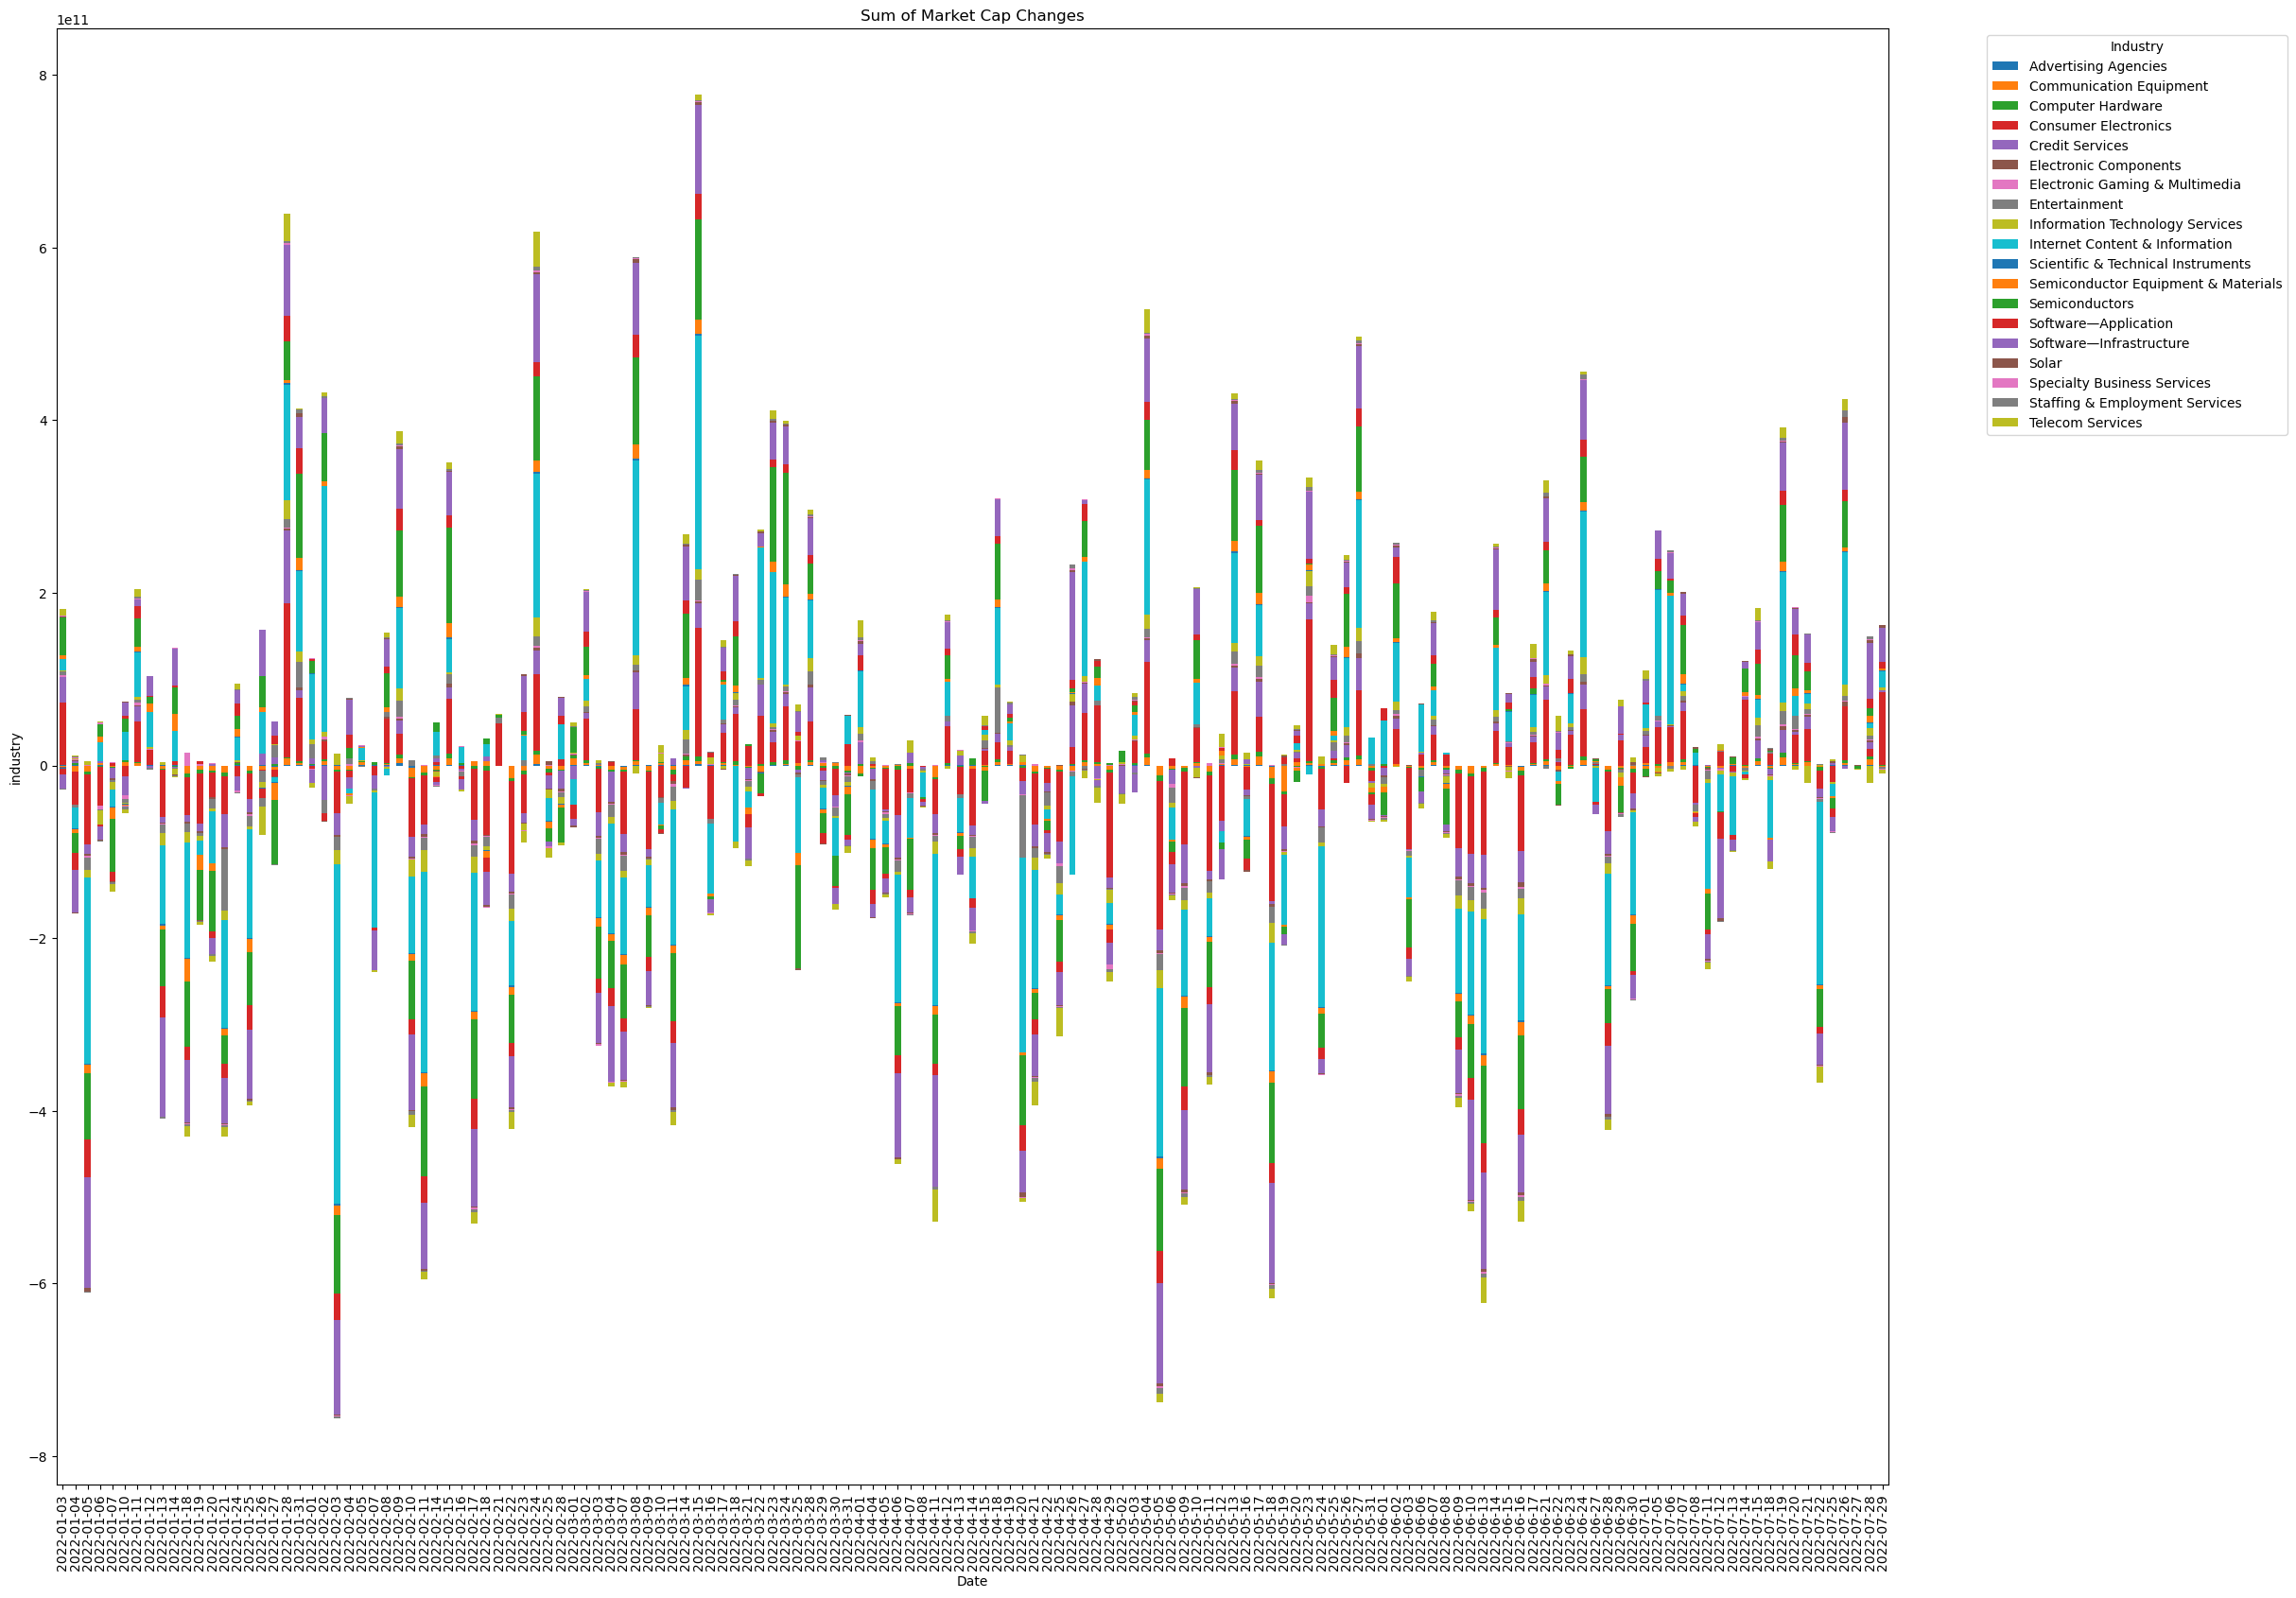

In [78]:
sector_2022_pivot.plot.bar(stacked=True, figsize=(25, 20), ylabel='industry', xlabel='Date', title='Sum of Market Cap Changes')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()